# Pymaceuticals Inc.
---

### Analysis

- There are very few outliers in the dataset for drug regimens in terms of the difference in tumor volumes. The only drug regimen that came out with an outlier was Infubinol. This is shown in the boxplot by the red dot. There is a relatively strong relationship between a mouses weight and their tumor volume when on the Capomulin drug regimen. This would be interesting to see the relationship all drugs have with the same critera to see if they are more or less predictable. I would assume the Infubinol drug regimen would have a weaker relationship considering the outliers from earlier in the homework. I suppose it is hard to study mice on a long timeframe since their lifespan is so short. The percentages of each sex are very close to equal and I would assume they would also be equally represented with each drug. I think the sample size is a bit small for the number of drugs represented in the dataframe. This could be because this is a teaching dataframe. I would be interested to understand why there were so many duplicate datapoints for the mouse that was taken out of the data in the first section of the module homework. 
 

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = ("data/Mouse_metadata.csv")
study_results_path = ("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
scc_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
scc_df.head()

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [66]:
scc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [67]:
# Checking the number of mice.
mouse_count = scc_df["Mouse ID"].nunique()
mouse_count

249

In [68]:
# Our data should be uniquely identified by Mouse ID and Timepoint

duplicate_rows_df = scc_df[scc_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_rows_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [69]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
bad_mice_ids = duplicate_rows_df["Mouse ID"].unique()

In [70]:
# Optional: Get all the data for the duplicate mouse ID. 
bad_mice_mask = scc_df["Mouse ID"].isin(bad_mice_ids) 
scc_df[bad_mice_mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [71]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#scc_df_final = scc_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
scc_df_final = scc_df.loc[~bad_mice_mask]
print(scc_df_final.shape)
scc_df_final.head()

(1880, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [72]:
# Checking the number of mice in the clean DataFrame.
scc_df_final_count = scc_df_final["Mouse ID"].nunique()
scc_df_final_count

248

In [73]:
scc_df_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [74]:
scc_df_final.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

means = scc_df_final.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians = scc_df_final.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances = scc_df_final.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sds = scc_df_final.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = scc_df_final.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                                "Median Tumor Volume":medians,
                                "Tumor Volume Variance":variances,
                                "Tumor Volume Std. Dev.":sds,
                                "Tumor Volume Std. Err.":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [76]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = scc_df_final.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

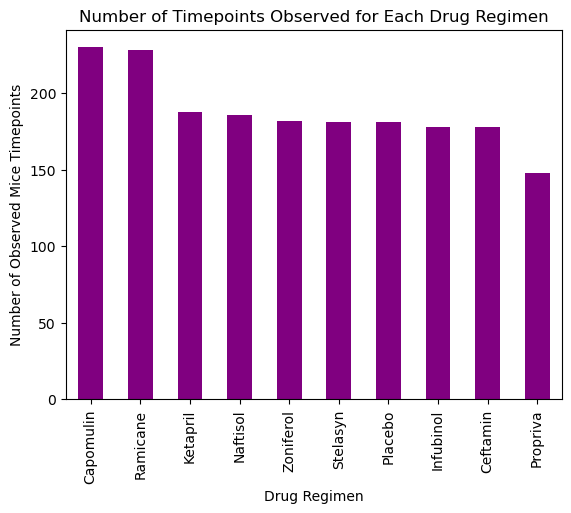

In [108]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = scc_df_final["Drug Regimen"].value_counts()
counts.plot(kind='bar', color="purple")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mice Timepoints")
plt.title('Number of Timepoints Observed for Each Drug Regimen')
plt.xticks(rotation=90)
plt.show()

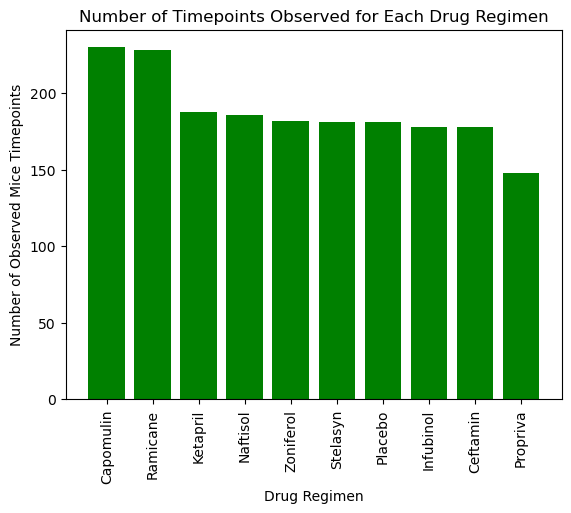

In [109]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = scc_df_final["Drug Regimen"].value_counts()
plt.bar(counts.index.values, counts.values, color="green")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mice Timepoints")
plt.title('Number of Timepoints Observed for Each Drug Regimen')
plt.xticks(rotation=90)
plt.show()


# data = df2["Drug Regimen"].value_counts()
# x = list(data.index)
# y = list(data.values)



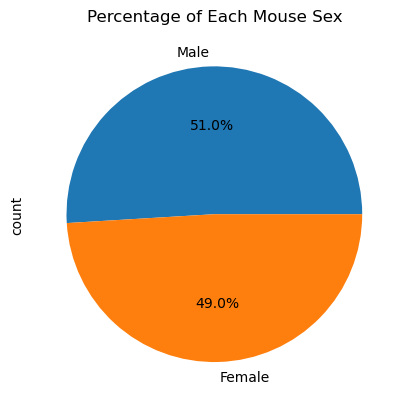

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts_gender = scc_df_final.Sex.value_counts()
counts_gender.plot(kind='pie', autopct = '%1.1f%%')
plt.title('Percentage of Each Mouse Sex')
plt.show()

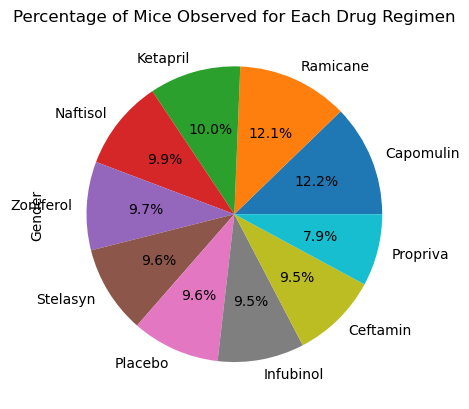

In [116]:
# Generate a pie plot showing the distribution of drug regimens
plt.pie(counts.values,labels=counts.index.values, autopct = '%1.1f%%')
plt.ylabel("Gender")
plt.title('Percentage of Mice Observed for Each Drug Regimen')
plt.show()

## Quartiles, Outliers and Boxplots
### Calculate the final tumor volume of each mouse across four of the treatment regimens:  
### Capomulin, Ramicane, Infubinol, and Ceftamin

In [81]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = scc_df_final.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_timepoint_df.merge(scc_df_final, on=["Mouse ID", "Timepoint"], how='left')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f'({drug} potential outliers: {outliers})')

(Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64)
(Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))


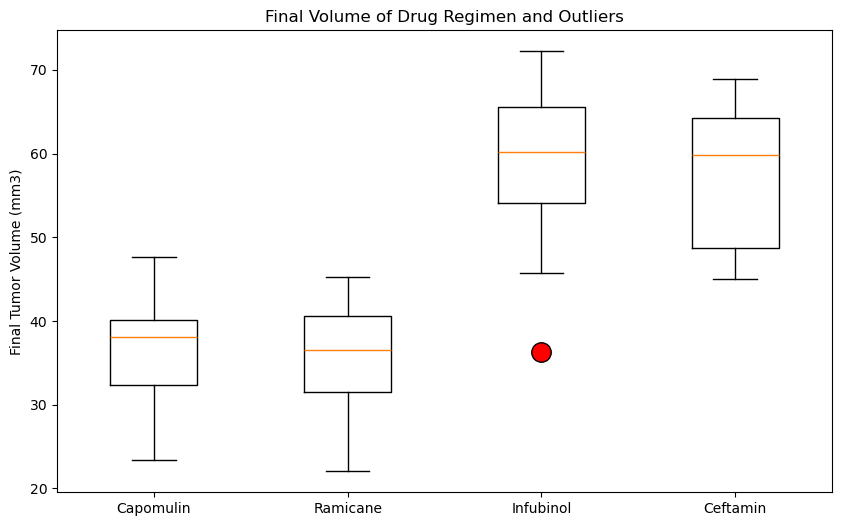

In [83]:
# the data
data = [72.555239,58.634971,61.433892,31.02392341,41.581521,45.000000,45.000000,45.000000,45.000000,45.000000]


## Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor='red',markersize=14)
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=red_dot)
plt.title('Final Volume of Drug Regimen and Outliers')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [84]:
capomulin_table = scc_df_final.loc[scc_df_final["Drug Regimen"]=="Capomulin"]
mouse_cap = capomulin_table.loc[capomulin_table["Mouse ID"] == "r944"]

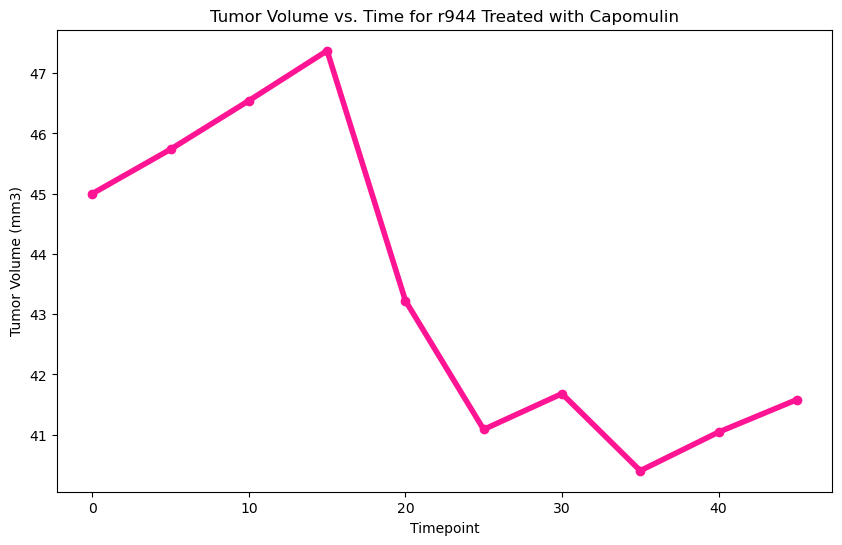

In [85]:
capomulin_table = scc_df_final.loc[scc_df_final["Drug Regimen"]=="Capomulin"]
mouse_cap = capomulin_table.loc[capomulin_table["Mouse ID"] == "r944"]

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_cap['Timepoint'], mouse_cap['Tumor Volume (mm3)'], marker='o', linewidth=4, color='deeppink')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time for r944 Treated with Capomulin')
plt.show()

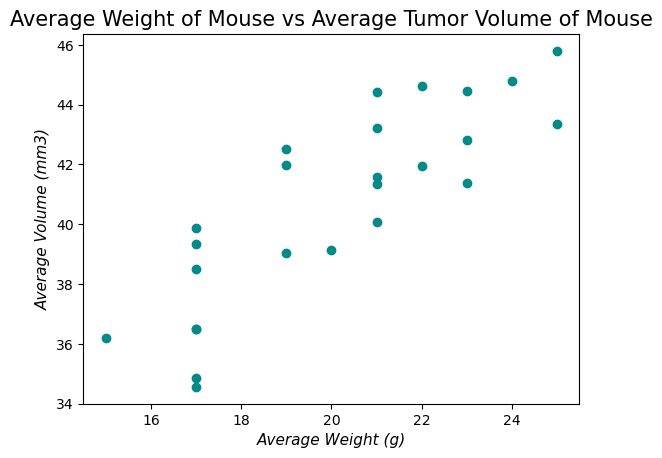

In [107]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = scc_df_final.loc[scc_df_final["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'], color='darkcyan', alpha=1)
plt.xlabel('Average Weight (g)', fontsize=11, fontstyle="italic")
plt.ylabel('Average Volume (mm3)', fontsize=11, fontstyle="italic")
plt.title('Average Weight of Mouse vs Average Tumor Volume of Mouse', fontsize=15)
plt.show()

## Correlation and Regression

In [94]:
#xpert helped me to be able to use linregress function

from scipy.stats import linregress
import numpy as np

In [95]:
# Calculate correlation coefficient and a linear regression modelmfor mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = capomulin_table['Weight (g)'].corr(capomulin_table['Tumor Volume (mm3)'])
slope, intercept, r_value, p_value, std_err = linregress(capomulin_table['Weight (g)'], capomulin_table['Tumor Volume (mm3)'])
print(correlation)
slope, intercept, r_value, p_value, std_err

0.5256995552077169


(0.9609669432428355,
 21.489827213299566,
 0.5256995552077169,
 9.605446629501521e-18,
 0.10298279892023657)

y = 0.95x + 21.55
The r-squared is: 0.7088568047708723


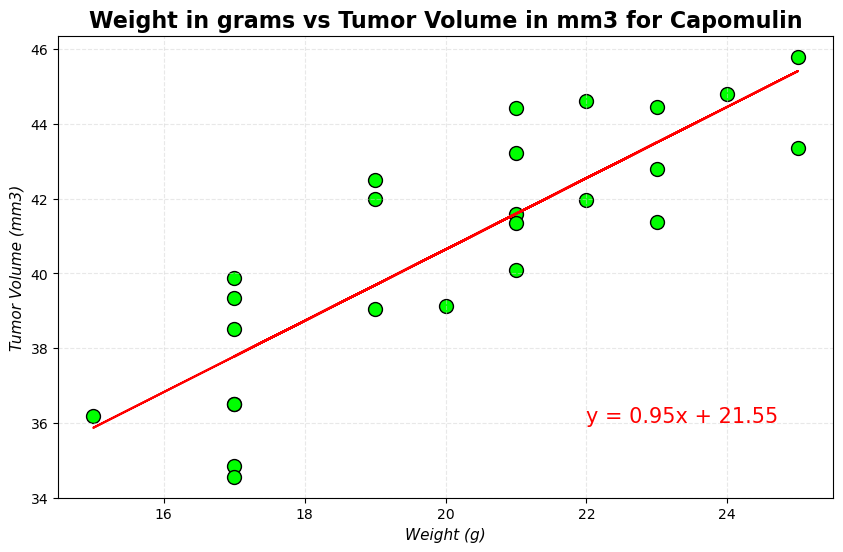

In [104]:
#make same scatter plot and get a linear regression line 
x_val = capomulin_average["Weight (g)"]
y_val = capomulin_average["Tumor Volume (mm3)"]

# makes line of "best" fit and calculate the predictions
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_val, y_val, facecolor="lime", edgecolor="black", s=100)
plt.plot(x_val, regress_values, "r-") # plot the line of best fit

# Step 4: Customizations
plt.xlabel("Weight (g)", fontsize=11, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=11, fontstyle="italic")
plt.title("Weight in grams vs Tumor Volume in mm3 for Capomulin", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(22, 36),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()